# MAC0318 - Teoria de controle

## Cinemática direta

Vamos primeiro simular o deslocamento do robô a partir de sinais de controle $u=\begin{bmatrix} v_A & \omega \end{bmatrix}^t$ especificando a velocidade linear e angular do referencial do robô.

<figure>
    <div style="text-align:center;">
        <img src="img/robot_kinematics.png" width="500" alt="robot kinematics">
    </div>
</figure>

A equação diferencial ordinária para a pose do robô $q = \begin{bmatrix} x & y & \theta \end{bmatrix}$ no referencial global é dada por:

$$
\dot{q}(t) 
= 
\begin{bmatrix}
 \dot{x}_A \\ \dot{y}_A \\ \dot{\theta}
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & 0 \\ 
\sin \theta & 0 \\ 
0 & 1
\end{bmatrix}
\begin{bmatrix}
v_A \\ \omega
\end{bmatrix}
$$

Como o computador só permite simular em tempo discreto, vamos aproximar a equação acima usando o método de integração direto de Euler, que transforma uma equação diferencial em uma equação de diferenças:

$$
q(t+\Delta t) = q(t) + \Delta t \cdot \dot{q}(t + \Delta t) \, ,
$$

onde $\Delta t$ é o tempo decorrido desde a última atualização (em segundos).

In [1]:
import numpy as np

def forward(x, v, w, dt):
    ''' Computa cinemática direta para intervalo de tempo dt e sinais de controle v e w '''
    # integração discreta
    dx = dt * np.array([v*np.cos(x[2]), v*np.sin(x[2]), w])
    x += dx

In [2]:
x = np.zeros(3) # estado inicial
print(x)
forward(x, 0.2, 0, 0.1) # move adiante com velocidade de 0.2m/s por 0.1s
print(x)
forward(x, 0., 10, 0.1) # gira a 10 rad/s no eixo por 0.1s
print(x)

[0. 0. 0.]
[0.02 0.   0.  ]
[0.02 0.   1.  ]


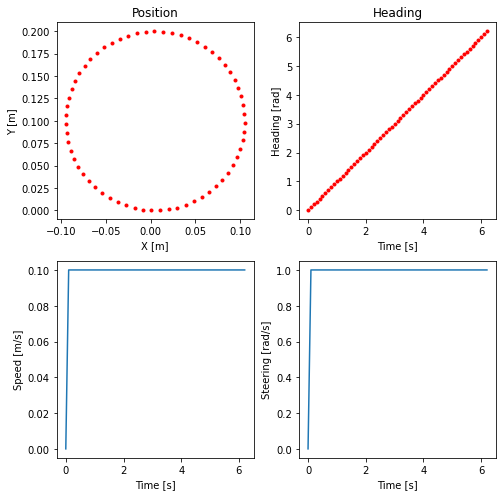

In [3]:
# Vamos usar uma biblioteca para exibir gráficos etc
from DifferentialDrive import DifferentialRobot 

robot_circle = DifferentialRobot() # dt = 0.1
# Dirija a uma velocidade constante com curvatura constante
for _ in range(62):
    robot_circle.forward(0.1, 1.0)
# exibe gráficos da trajetória
robot_circle.plot();

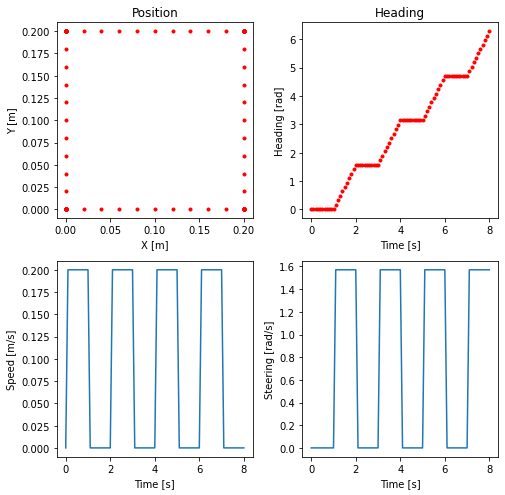

In [4]:
square_robot = DifferentialRobot()

# repetir 4 vezes
for _ in range(4):
    # ande em linha reta por 10 intervalos de tempo [1s]
    for _ in range(10):
        square_robot.forward(0.2, 0.0)
    # gira 90 graus
    for _ in range(10):
        square_robot.forward(0.0, np.pi/2)
        
# exibe trajetória
square_robot.plot();

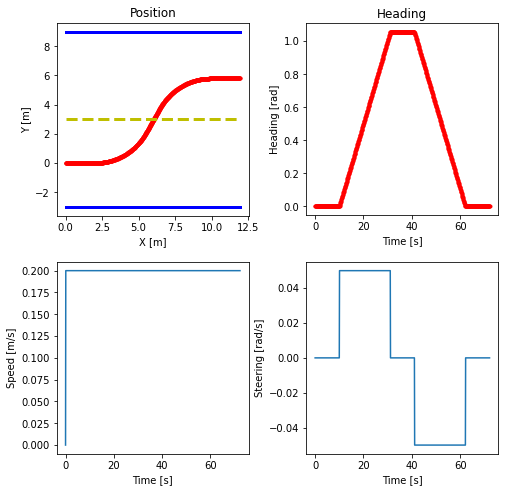

In [5]:
# Simula mudança de faixa de pista
lane_changer = DifferentialRobot()
v = 0.2 # manter velocidade constante
steer = 100*[0.0] + 211*[0.05] + 100*[0.0] + 211*[-0.05] + 100*[0.0] # sinal de controle de velocidade angular
for w in steer:
    lane_changer.forward(v, w)
# exibe trajetória
fig, axes = lane_changer.plot();
# desenhe faixas
axes[0,0].plot([0.0, lane_changer.x[0]],[-3, -3], 'b', lw=3);
axes[0,0].plot([0.0, lane_changer.x[0]],[3, 3], 'y--', lw=3);
axes[0,0].plot([0.0, lane_changer.x[0]],[9, 9], 'b', lw=3);

## Mais sobre cinemática direta

Vamos agora implementar um simulador de trajetória de um robô diferencial 2D a partir de sinais de controle de velocidade angulares das rodas $u = \begin{bmatrix} \varphi_l & \varphi_r \end{bmatrix}^t$. A equação nesse caso é dada por:

$$
\begin{bmatrix}
 \dot{x}_A \\ \dot{y}_A \\ \dot{\theta}
\end{bmatrix}= 
\frac{R}{2}
\begin{bmatrix}
\cos \theta & 0 \\ 
\sin \theta & 0 \\ 
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\ \frac{1}{L} & -\frac{1}{L}
\end{bmatrix}
\begin{bmatrix}
\dot{\varphi}_l \\ \dot{\varphi}_r
\end{bmatrix}
$$

Mais uma vez vamos adotar a aproximação por Euler:


$$
q(t+\Delta t) = q(t) + \Delta t \cdot \dot{q}(t + \Delta t) \, .
$$


In [6]:
def forward2(x, phi_l, phi_r, dt, LL, R):
    ''' Computa cinemática direta para intervalo de tempo dt e sinais de controle phi_l e phi_r.
    LL é a distância entre as rodas, R é o raio das rodas e dt é o intervalo de tempo desde a 
    última atualização. '''
    # integração discreta
    v = R*(phi_l+phi_r)/2
    w = R*(phi_r-phi_l)*LL    
    forward(x, v, w, dt)

In [7]:
x = np.zeros(3) # estado inicial
print(x)
forward2(x, 10, 10, 0.1, 0.1, 0.0381) # move adiante com velocidade constante por 0.1s
print(x)
forward2(x, -10, 10, 0.1, 0.1, 0.0381) # gira a 10 rad/s no eixo por 0.1s
print(x)

[0. 0. 0.]
[0.0381 0.     0.    ]
[0.0381  0.      0.00762]


In [8]:
from DifferentialDrive import DifferentialRobot2

robot2 = DifferentialRobot2()
robot2.forward(10, 10) # move forward 
robot2.forward(-10, 10) # then rotate in place
robot2.x_hist

[array([0., 0., 0.]),
 array([0.0381, 0.    , 0.    ]),
 array([0.0381 , 0.     , 0.00762])]

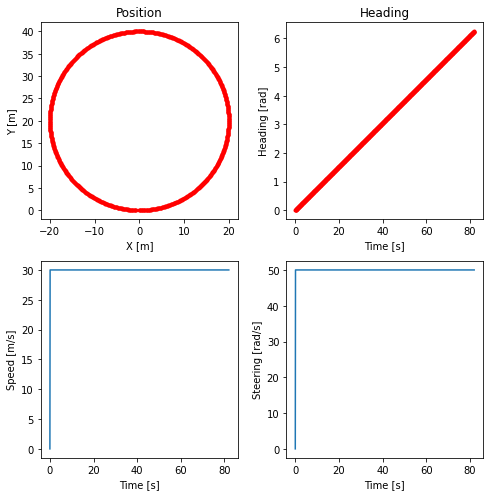

In [9]:
circle_robot2 = DifferentialRobot2()
for _ in range(820): 
    circle_robot2.forward(30, 50)
# plot trajectory
circle_robot2.plot();